# Figure 4. p63RE dependent activity

In [2]:
#import libraries
import pandas as pd
from statannotations.Annotator import Annotator
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#from statannotations.Annotator import Annotator
import os
#generate statannotations-compatable list of comparisons
def stats_comp_pair(x_list, hue_list):
	l=[]
	for x in x_list:
		l.append([(x,hue_list[0]),(x,hue_list[1])])
	return l
#set seaborn theme for nice figures
sns.set_theme(style="ticks",rc={"axes.spines.right": False, "axes.spines.top": False, 'font.size':10}, font='arial')
act_palette = {'Activating': sns.color_palette('RdYlBu')[-1], 'Repressing':sns.color_palette('RdYlBu')[0], 'Unchanged':sns.color_palette('RdGy')[4]}
#use math reg expression to shorten names on graphs
change_p53 = {'primary':'$\mathregular{1^{o}}$','secondary':'$\mathregular{2^{o}}$','quartenary':'$\mathregular{4^{o}}$', 'quinary':'$\mathregular{5^{o}}$'}
change_p63 = {'primary':'$\mathregular{1^{o}}$','secondary':'$\mathregular{2^{o}}$', 'tertiary':'$\mathregular{3^{o}}$','quartenary':'$\mathregular{4^{o}}$', 'quinary':'$\mathregular{5^{o}}$','senary':'$\mathregular{6^{o}}$'}
wtmut_palette = {'WT':'forestgreen', 'mut':'crimson','flankShuffle':'coral'}
order = ['Activating', 'Unchanged', 'Repressing']
#import key tables
os.chdir('..\data')
fig_out_path = r'..\figures'
df = pd.read_excel('Table S3.xlsx', sheet_name='MCF10A_WT_p53KO')

## Figure 4A

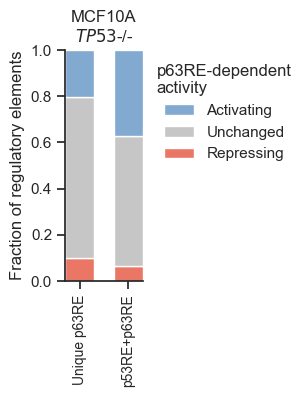

In [3]:
#use only p53KO cell line and WT to avoid duplicates
df_ko = df[(df.cell_line == 'MCF10A p53KO') & (df.enhancer_variant == 'WT')]
# df_ko.replace({'MCF10A p53KO': 'MCF10A '+ '$\it{TP53}-/-$'}, inplace=True)
df_ko['xlabel'] = df_ko.apply(lambda row: row.cell_line + '\n' + row.p63RE_type, axis='columns')
df_ko['p63RE_type'] = pd.Categorical(df_ko['p63RE_type'], ['Unique p63RE','p53RE+p63RE'])
#2A stacked barchart
fig, ax = plt.subplots(figsize=(1,3))
sns.histplot(
    data=df_ko,
    x="p63RE_type", hue="activity", hue_order=['Activating', 'Unchanged','Repressing'],
    multiple="fill", stat="percent", palette= act_palette,
    discrete=True, shrink=.6,ax=ax).set(ylabel = 'Fraction of regulatory elements', xlabel=None, title = 'MCF10A\n$\it{TP53}$-/-')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90, size=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title = 'p63RE-dependent\nactivity')
fig.savefig(os.path.join(fig_out_path,'4A.pdf'), dpi=300, transparent=True, bbox_inches='tight')

In [4]:
#get number for the text
df_ko.value_counts(subset=['activity', 'p63RE_type'])

activity    p63RE_type  
Unchanged   Unique p63RE    3750
            p53RE+p63RE     2669
Activating  p53RE+p63RE     1746
            Unique p63RE    1111
Repressing  Unique p63RE     551
            p53RE+p63RE      302
dtype: int64

 - Add convenient labels for motif classes
 - Remove 'septanary class since there's only 2 elements

In [ ]:
df= df[df.p63RE_class != 'septary'] #there's only 2 of them
#rename long motif labels so that they're short on graphs
comb = {**change_p53,**change_p63}
df['class_labels'] = df['p63RE_class'].apply(lambda x: comb[x])

## Figure 4B

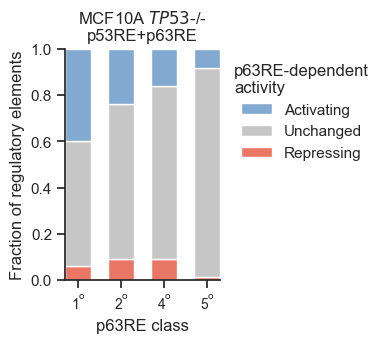

In [4]:
#separate into 4 motif groups and label them
df_ko_both = df[(df.p63RE_type == 'p53RE+p63RE') & (df.cell_line == 'MCF10A p53KO') & (df.enhancer_variant == 'WT')]
df_ko_both['class_labels'] = pd.Categorical(df_ko_both['class_labels'],change_p53.values())
fig, ax = plt.subplots(figsize=(2,3))
sns.histplot(
    data=df_ko_both,
    x="class_labels", hue="activity", hue_order=['Activating', 'Unchanged','Repressing'],
    multiple="fill", stat="percent", palette= act_palette,
    discrete=True, shrink=.6,ax=ax).set(ylabel = 'Fraction of regulatory elements',xlabel='p63RE class', title = 'MCF10A $\it{TP53}$-/-\np53RE+p63RE')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0, size=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title = 'p63RE-dependent\nactivity')
fig.savefig(os.path.join(fig_out_path,'4B.pdf'), dpi=300, transparent=True, bbox_inches='tight')

In [5]:
#get number for the text
df_ko_both.value_counts(subset=['activity', 'p63RE_class'])

activity    p63RE_class
Unchanged   primary        2140
Activating  primary        1580
Unchanged   secondary       432
Repressing  primary         240
Activating  secondary       153
Unchanged   quinary          64
Repressing  secondary        57
Unchanged   quartenary       33
Activating  quartenary        7
            quinary           6
Repressing  quartenary        4
            quinary           1
dtype: int64

## Figure 4C

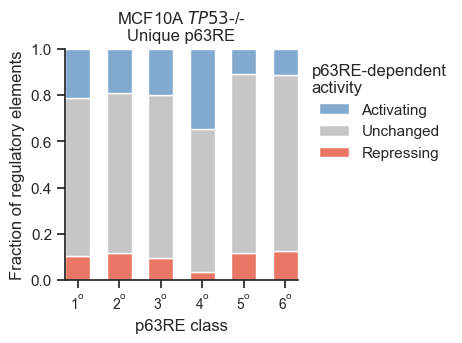

In [6]:
df['class_labels'] = df['p63RE_class'].apply(lambda x: comb[x])
#separate into 6 motif groups and label them
#expluding septanary since there's only 4 of them
df_ko_p63 = df[(df.p63RE_type != 'p53RE+p63RE') & (df.cell_line == 'MCF10A p53KO') & (df.enhancer_variant == 'WT')]
df_ko_p63['class_labels'] = pd.Categorical(df_ko_p63['class_labels'],change_p63.values())
fig, ax = plt.subplots(figsize=(3,3))
sns.histplot(
    data=df_ko_p63,
    x="class_labels", hue="activity", hue_order=['Activating', 'Unchanged','Repressing'],
    multiple="fill", stat="percent", palette= act_palette,
    discrete=True, shrink=.6,ax=ax).set(ylabel = 'Fraction of regulatory elements',xlabel='p63RE class', title = 'MCF10A $\it{TP53}$-/-\nUnique p63RE')
ax.set_xticklabels(ax.get_xticklabels(),rotation=0, size=10)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1), frameon=False, title = 'p63RE-dependent\nactivity')
fig.savefig(os.path.join(fig_out_path,'4C.pdf'), dpi=300, transparent=True, bbox_inches='tight')

In [10]:
df_ko_p63.p63RE_class.value_counts()

primary       3914
tertiary       754
secondary      470
quinary        128
senary          89
quartenary      55
Name: p63RE_class, dtype: int64

## Figure 4D

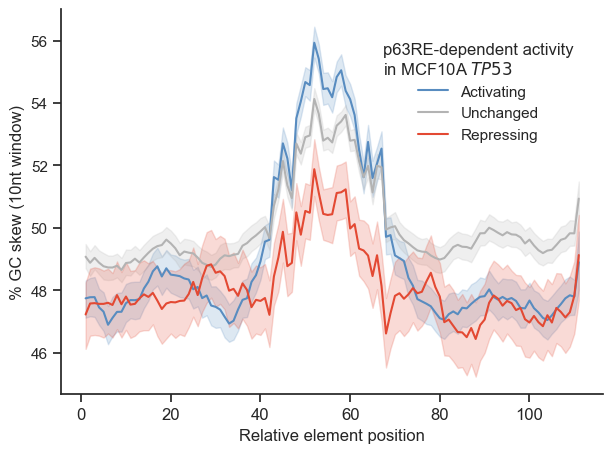

In [12]:
#draw GC skew accross enhacner
gc = pd.read_csv('p63enh_starrseq_gcskew_matched_MCF10Ap53KO.csv', index_col=0)
fig4D, ax = plt.subplots(figsize=(7,5))
sns.lineplot(data=gc, x='position', y='GC_skew', hue='activity', hue_order=['Activating', 'Unchanged', 'Repressing'],palette=act_palette,ax=ax).set(
	ylabel = '% GC skew (10nt window)', xlabel = 'Relative element position')
sns.move_legend(ax, "upper right",bbox_to_anchor=(0.97,0.95), frameon=False, title = 'p63RE-dependent activity\nin MCF10A ' + '$\it{TP53}$') #add -/- in addinity designer
fig4D.savefig(os.path.join(fig_out_path,'4D.pdf'), dpi=300, transparent=True, bbox_inches='tight')

## Figure 4E

p-value annotation legend:
      ns: 5.00e-02 < p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Repressing_WT vs. Repressing_mut: Wilcoxon test (paired samples) with Bonferroni correction, P_val:1.883e-140 Stat=0.000e+00
Activating_WT vs. Activating_mut: Wilcoxon test (paired samples) with Bonferroni correction, P_val:0.000e+00 Stat=0.000e+00
Unchanged_WT vs. Unchanged_mut: Wilcoxon test (paired samples) with Bonferroni correction, P_val:5.566e-78 Stat=7.510e+06
Repressing_WT vs. Repressing_flankShuffle: Wilcoxon test (paired samples) with Bonferroni correction, P_val:6.781e-61 Stat=6.284e+04
Unchanged_WT vs. Unchanged_flankShuffle: Wilcoxon test (paired samples) with Bonferroni correction, P_val:1.317e-27 Stat=8.659e+06
Activating_WT vs. Activating_flankShuffle: Wilcoxon test (paired samples) with Bonferroni correction, P_val:1.839e-50 Stat=1.376e+06


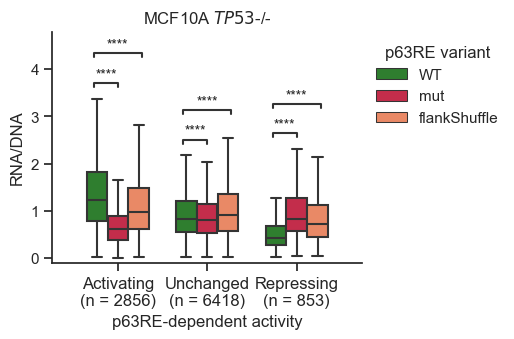

In [13]:
df_ko = df[(df.cell_line == 'MCF10A p53KO') & ((df.enhancer_variant == 'WT') | 
											   (df.enhancer_variant == 'mut') | 
											   (df.enhancer_variant == 'flankShuffle'))]
fig4E, ax = plt.subplots(figsize=(4,3))
sns.set_context(rc={"xtick.labelsize":12})
sns.boxplot(data = df_ko, x = 'activity', y = 'RNA/DNA', hue = 'enhancer_variant', order=order, width=0.7, 
			palette = wtmut_palette, showfliers=False, ax=ax).set(ylim=(-0.1,4),xlabel='p63RE-dependent activity', title='MCF10A $\it{TP53}$-/-')
compare = [[('Activating', 'WT'),('Activating', 'mut')],[('Activating', 'WT'),('Activating', 'flankShuffle')],
		   [('Unchanged', 'WT'),('Unchanged', 'mut')],[('Unchanged', 'WT'),('Unchanged', 'flankShuffle')],
		   [('Repressing', 'WT'),('Repressing', 'mut')],[('Repressing', 'WT'),('Repressing', 'flankShuffle')]]
annotator = Annotator(ax=ax, pairs = compare, data = df_ko, x = 'activity', y = 'RNA/DNA', hue='enhancer_variant',order=order)
annotator.configure(test = "Wilcoxon", comparisons_correction = 'Bonferroni').apply_and_annotate()
ax.legend(frameon = False, title = 'p63RE variant')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
#count number of enhancers and add to labels
counts = df_ko[df_ko.enhancer_variant == 'WT'].value_counts(subset='activity').to_dict()
ax.set_xticklabels([x + '\n(n = ' + str(counts[x]) + ')' for x in order])
fig4E.savefig(os.path.join(fig_out_path,'4E.eps'), dpi=300, transparent=True, bbox_inches='tight')

## Figure 4F. 
### TF motif enrichment in p63RE-depdent activating or repressing regulatory elements using Homer
- Create 3 lists of p63RE coordinates based on regulatory elements activity (1.5FC threshold) in MCF10A p53KO
- Use homer with the foliwing parameters:
	+ *findMotifsGenome.pl*
	+ List of 'activatin' or 'Repressing' p63RE coordinates
	+ *-size* 60 (looks up sequence 60nt in each direction from coordinate center; MPRA fragments are 119-120nt)
	+ *-bg* list of 'Unchanged' p63RE coordinates
- Use the output knownmotifs.txt table to plot motif enrichment

In [40]:
#import libraries
import pandas as pd
import os
order = ['Activating', 'Unchanged', 'Repressing']
#import key tables
os.chdir('..\data')
out_path = '..\homer'
df = pd.read_excel('Table S2.xlsx', sheet_name='MCF10A_WT_p53KO')
#only need p53KOs and one variant to remove duplicated locations
df = df[(df.cell_line == 'MCF10A p53KO') & (df.enhancer_variant == 'WT')]
df[['chrom','p63RE_start','p63RE_end']] = df.apply(lambda row: row['loc'].split('_'), result_type='expand', axis='columns')
df_act = df[df.activity == 'Activating']
df_rep = df[df.activity == 'Repressing']
df_unch = df[df.activity == 'Unchanged']
#export text files with p63RE corrdinates in homer format
df_act.loc[:,['loc','chrom','p63RE_start','p63RE_end','strand']].to_csv(os.path.join(out_path,'homer_act_MCF10Ap53KO.txt'), index=False, header=False,sep='\t')
df_rep.loc[:,['loc','chrom','p63RE_start','p63RE_end','strand']].to_csv(os.path.join(out_path,'homer_rep_MCF10Ap53KO.txt'), index=False, header=False,sep='\t')
df_unch.loc[:,['loc','chrom','p63RE_start','p63RE_end','strand']].to_csv(os.path.join(out_path,'homer_unch_MCF10Ap53KO.txt'), index=False, header=False,sep='\t')
#run homer motif enrichemnt using these act/rep files and unchanged enhancers as background

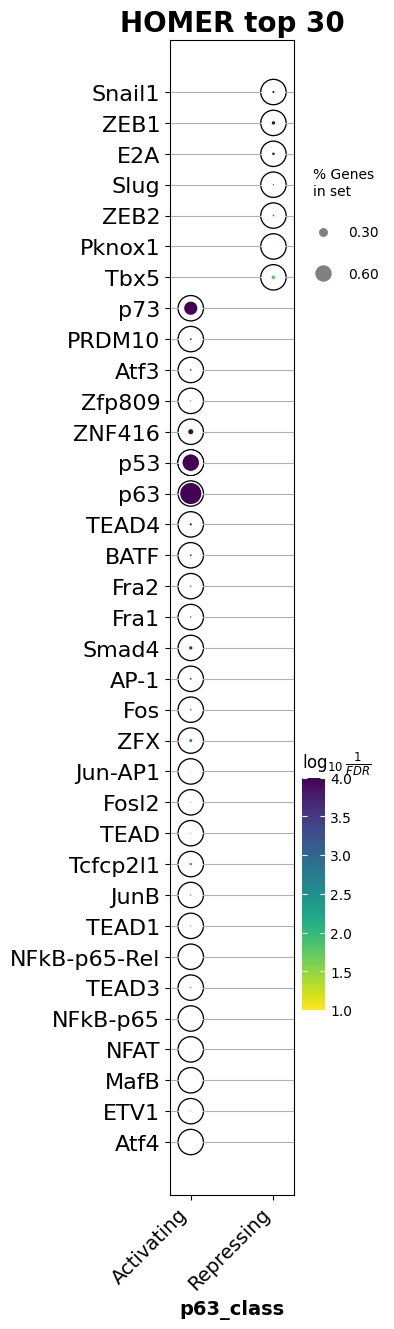

In [1]:
#dotplot prep
import pandas as pd
import os
from gseapy import dotplot
def overlap(r):
	target = round(r[long.columns[5]])
	perc = float(r['% of Target Sequences with Motif'].strip('%'))
	if perc == 0.0:
		return '0'
	total = round((target * 100) / perc)
	ovlp = str(target) + '/' + str(total)
	return ovlp
top = 30 #top motifs
#read in and format homer output
homer_path = '..\homer'
fig_path = r'..\figures'
act = pd.read_csv(os.path.join(homer_path,'homer_act_MCF10Ap53KO_bg_unch','knownResults.txt'), sep='\t')
rep = pd.read_csv(os.path.join(homer_path,'homer_rep_MCF10Ap53KO_bg_unch','knownResults.txt'), sep='\t')
act['p63_class'], rep['p63_class'] = 'Activating','Repressing'
#rename variable columns for concatenation
for tbl in [act, rep]:
	tbl.rename(columns={tbl.columns[5]:'# of Target Sequences with Motif',
	tbl.columns[7]:'# of Background  Sequences with Motif'}, inplace=True)
#merge into one long table
long = pd.concat([act, rep],axis=0, ignore_index=True)
#simplify motif name by exrtacting short name
long['tf'] = long['Motif Name'].apply(lambda x: x[:x.find('(')])
#calculate % overlap
long['Overlap'] = long.apply(lambda row: overlap(row),axis='columns')
long.rename(columns={'q-value (Benjamini)':"Adjusted P-value"},inplace=True)
#use this if need to remove p53/63/73 since they're always enriched
filtered = long[~long.tf.isin(['Mouse_Recombination_Hotspot'])]
ax = dotplot(filtered,
              column="Adjusted P-value",
              x='p63_class', # set x axis, so you could do a multi-sample/library comparsion
			  y='tf',
              size=3,
              top_term=top,
              figsize=(2,15),
              title = "HOMER top " + str(top),
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o')#, ofname = os.path.join(fig_path,'4F.pdf'))

## Figure S6. Supplementary figure to show enrichment when using whole genome as the background

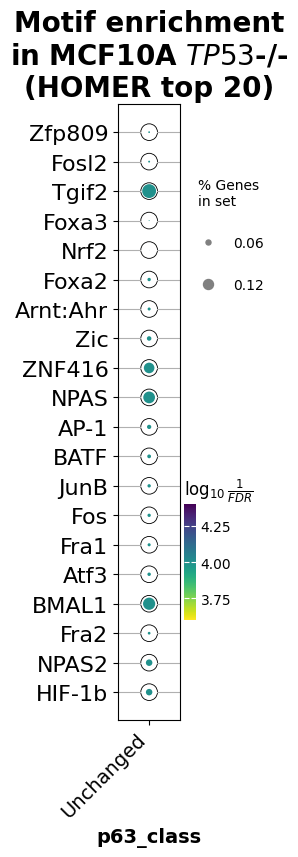

In [8]:
#dotplot prep
import numpy as np
import pandas as pd
import os
from gseapy import dotplot
def overlap(r):
	target = round(r[long.columns[5]])
	perc = float(r['% of Target Sequences with Motif'].strip('%'))
	if perc == 0.0:
		return '0'
	total = round((target * 100) / perc)
	ovlp = str(target) + '/' + str(total)
	return ovlp
top = 20 #top motifs
#read in and format homer output
homer_path = '..\homer'
fig_path = r'..\figures'
unch = pd.read_csv(os.path.join(homer_path,'homer_unch_MCF10Ap53KO','knownResults.txt'), sep='\t')
unch['p63_class'] = 'Unchanged'
#rename variable columns for concatenation
for tbl in [unch]:
	tbl.rename(columns={tbl.columns[5]:'# of Target Sequences with Motif',
	tbl.columns[7]:'# of Background  Sequences with Motif'}, inplace=True)
#merge into one long table
long = unch.copy()
#simplify motif name by exrtacting short name
long['tf'] = long['Motif Name'].apply(lambda x: x[:x.find('(')])
#calculate % overlap
long['Overlap'] = long.apply(lambda row: overlap(row),axis='columns')
long.rename(columns={'q-value (Benjamini)':"Adjusted P-value"},inplace=True)
#use this if need to remove p53/63/73 since they're always enriched
filtered = long[~long.tf.isin(['p53','p63','p73', 'Mouse_Recombination_Hotspot'])]
ax = dotplot(filtered,
              column="Adjusted P-value",
              x='p63_class', # set x axis, so you could do a multi-sample/library comparsion
			  y='tf',
              size=10,
              top_term=top,
              figsize=(1,8),
              title = "Motif enrichment\nin MCF10A $\it{TP53}$-/-\n(HOMER top " + str(top) + ')',
              xticklabels_rot=45, # rotate xtick labels
              show_ring=True, # set to False to revmove outer ring
              marker='o')#, ofname = os.path.join(fig_path,'S5.eps'))